Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.5680462105369584
Residuals are normally distributed


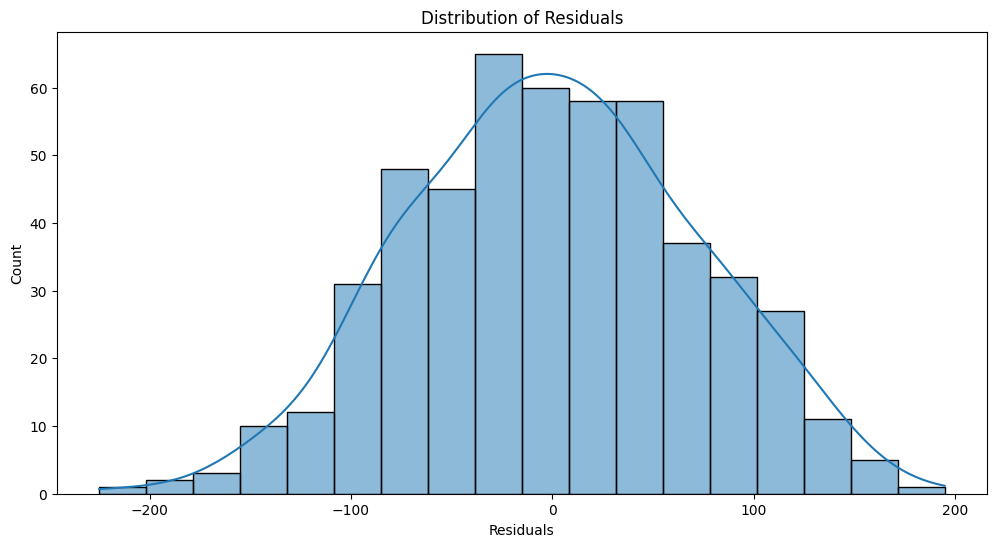


Assumption satisfied


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.stats.diagnostic import normal_ad

# Function to calculate residuals (actual vs predicted values)
def calculate_residuals(model, features, label):
    """
    Calculate residuals between actual and predicted values.
    """
    # Predicting using the provided model
    predicted = model.predict(features)
    
    # Creating a DataFrame to store actual and predicted values
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predicted})
    df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
    
    return df_results

# Function to check the normal errors assumption
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals.
    """
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.histplot(df_results['Residuals'], kde=True)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

# Generate artificial linear data
linear_X, linear_y = make_regression(n_samples=506, n_features=13, noise=75, random_state=46)

# Fit the model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Test the normal errors assumption
normal_errors_assumption(linear_model, linear_X, linear_y)

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.1621834631733667e-25
Residuals are not normally distributed


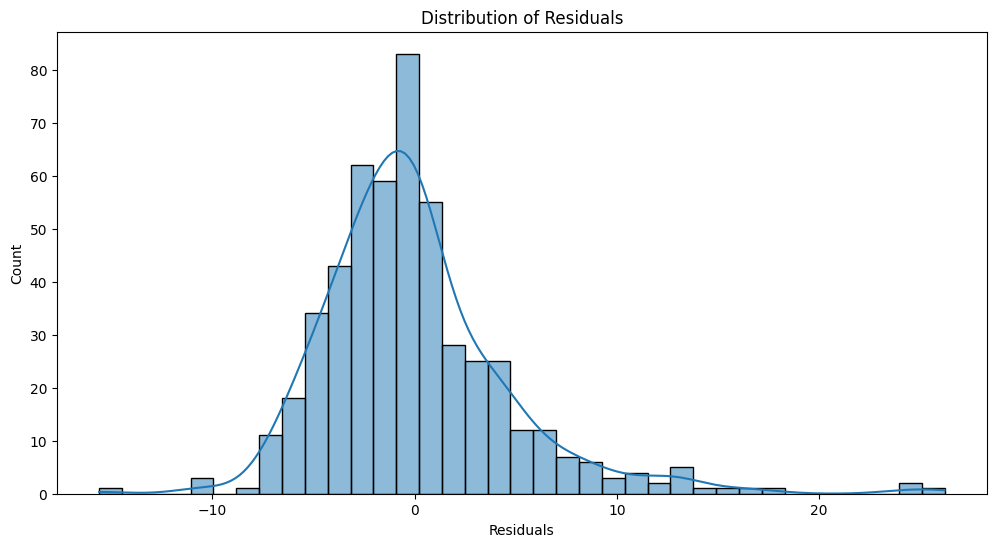


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import normal_ad

# Function to calculate residuals (actual vs predicted values)
def calculate_residuals(model, features, label):
    """
    Calculate residuals between actual and predicted values.
    """
    # Predicting using the provided model
    predicted = model.predict(features)
    
    # Creating a DataFrame to store actual and predicted values
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predicted})
    
    # Calculate residuals
    df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
    
    return df_results

# Function to check the normality of residuals
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals.
    """
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')
    
    # Performing the Anderson-Darling test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.histplot(df_results['Residuals'], kde=True)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

# Example usage with the Boston dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)
X = boston_df.drop('medv', axis=1)
y = boston_df['medv']

# Fit the model
boston_model = LinearRegression()
boston_model.fit(X, y)

# Test the normality assumption
normal_errors_assumption(boston_model, X, y)